# Gas Price Prediction

author: "Suresh, Reinert and Mullick"

date: "4/6/2022"

This project focuses on analyzing the historical gas price trend and predict the future gas price. As we know, the prices at the pump started rising once the lockdowns were lifted and have spiraled faster since the start of the war. Our idea is to predict weekly gas prices using indicators like crude oil price, stocks, import/export etc.  

The data source details are mentioned as follows.

* Historical gas price - https://www.eia.gov/opendata/qb.php?sdid=PET.EMM_EPM0U_PTE_NUS_DPG.W

* Crude oil spot price - https://www.eia.gov/opendata/qb.php?sdid=PET.RWTC.D

* Stocks of gasoline - https://www.eia.gov/opendata/qb.php?sdid=PET.WGFSTUS1.W

* Supply of gasoline - https://www.eia.gov/opendata/qb.php?sdid=PET.W_EPM0_VSD_NUS_DAYS.W

* Refinery capacity - https://www.eia.gov/opendata/qb.php?sdid=PET.WPULEUS3.W

* Crude oil exports - https://www.eia.gov/opendata/qb.php?sdid=PET.WCREXUS2.W

* Crude oil imports - https://www.eia.gov/opendata/qb.php?sdid=PET.WCRIMUS2.W

In [352]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [353]:
# Load the rpy2 extension
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Data Preparation

In [354]:
#Import the gasoline price data
df_gasoline_price = pd.read_csv('data/U.S._All_Grades_Conventional_Retail_Gasoline_Prices_Weekly.csv', skiprows = 4)

In [355]:
#Rename columns to Gas_price_date and Gas_price_per_gallon
df_gasoline_price.rename(columns={'Week of': 'Gas_price_date', 'Series ID: PET.EMM_EPM0U_PTE_NUS_DPG.W Dollars per Gallon': 'Gas_price_per_gallon'}, inplace=True)

In [356]:
# To match date values from other sources, subtract three days from Gas_price_date
df_gasoline_price['Gas_price_date'] = pd.DatetimeIndex(df_gasoline_price['Gas_price_date'])
df_gasoline_price['Date'] = df_gasoline_price['Gas_price_date'] -  pd.to_timedelta(3, unit='d')

In [357]:
#Change date format to MM/DD/YYYY format for Date and Gas_price_date
df_gasoline_price['Date'] = df_gasoline_price['Date'].dt.strftime('%m/%d/%Y')
df_gasoline_price['Gas_price_date'] = df_gasoline_price['Gas_price_date'].dt.strftime('%m/%d/%Y')

In [358]:
df_gasoline_price.head(5)

,Gas_price_date,Gas_price_per_gallon,Date
0,04/04/2022,4.096,04/01/2022
1,03/28/2022,4.152,03/25/2022
2,03/21/2022,4.165,03/18/2022
3,03/14/2022,4.252,03/11/2022
4,03/07/2022,4.031,03/04/2022


In [359]:
#Import the crude oil spot price data
df_crude_spot_price = pd.read_csv('data/Cushing_OK_WTI_Spot_Price_FOB_Weekly.csv', skiprows = 4)

In [360]:
#Rename columns to Date and Crude_price_per_barrel
df_crude_spot_price.rename(columns={'Week of': 'Date', 'Series ID: PET.RWTC.W Dollars per Barrel': 'Crude_price_per_barrel'}, inplace=True)

In [361]:
df_crude_spot_price.head()

,Date,Crude_price_per_barrel
0,03/25/2022,113.69
1,03/18/2022,100.43
2,03/11/2022,113.39
3,03/4/2022,106.80
4,02/25/2022,92.18


In [362]:
#Import the stock data
df_stock_gasoline = pd.read_csv('data/U.S._Ending_Stocks_of_Finished_Motor_Gasoline_Weekly.csv', skiprows = 4)

In [363]:
#Rename columns to Date and Stocks_per_thousand_barrels
df_stock_gasoline.rename(columns={'Week of': 'Date', 'Series ID: PET.WGFSTUS1.W Thousand Barrels': 'Stocks_per_thousand_barrels'}, inplace=True)

In [364]:
df_stock_gasoline.head()

,Date,Stocks_per_thousand_barrels
0,03/25/2022,18971
1,03/18/2022,18344
2,03/11/2022,17123
3,03/4/2022,19062
4,02/25/2022,17714


In [365]:
#Import the gasoline supply data
df_gasoline_supply = pd.read_csv('data/U.S._Days_of_Supply_of_Total_Gasoline_Weekly.csv', skiprows = 4)

In [366]:
#Rename columns to Date and No_of_days
df_gasoline_supply.rename(columns={'Week of': 'Date', 'Series ID: PET.W_EPM0_VSD_NUS_DAYS.W Number of Days': 'No_of_days'}, inplace=True)

In [367]:
df_gasoline_supply.head()

,Date,No_of_days
0,03/25/2022,27.3
1,03/18/2022,27.0
2,03/11/2022,27.3
3,03/4/2022,28.0
4,02/25/2022,28.0


In [368]:
#Import the refinery capacity data
df_refinery_capacity = pd.read_csv('data/U.S._Percent_Utilization_of_Refinery_Operable_Capacity_Weekly.csv', skiprows = 4)

In [369]:
#Rename columns to Date and Utilization_percentage
df_refinery_capacity.rename(columns={'Week of': 'Date', 'Series ID: PET.WPULEUS3.W Percent': 'Utilization_percentage'}, inplace=True)

In [370]:
df_refinery_capacity.head()

,Date,Utilization_percentage
0,03/25/2022,92.1
1,03/18/2022,91.1
2,03/11/2022,90.4
3,03/4/2022,89.3
4,02/25/2022,87.7


In [371]:
#Import the crude oil export data
df_crude_exports = pd.read_csv('data/U.S._Exports_of_Crude_Oil_Weekly.csv', skiprows = 4)

In [372]:
#Rename columns to Date and Exp_thousand_barrels_per_day
df_crude_exports.rename(columns={'Week of': 'Date', 'Series ID: PET.WCREXUS2.W Thousand Barrels per Day': 'Exp_thousand_barrels_per_day'}, inplace=True)

In [373]:
df_crude_exports.head()

,Date,Exp_thousand_barrels_per_day
0,03/25/2022,2988
1,03/18/2022,3844
2,03/11/2022,2936
3,03/4/2022,2422
4,02/25/2022,3796


In [374]:
#Import the crude oil import data
df_crude_imports = pd.read_csv('data/U.S._Imports_of_Crude_Oil_Weekly.csv', skiprows = 4)

In [375]:
#Rename columns to Date and Imp_thousand_barrels_per_day
df_crude_imports.rename(columns={'Week of': 'Date', 'Series ID: PET.WCRIMUS2.W Thousand Barrels per Day': 'Imp_thousand_barrels_per_day'}, inplace=True)

In [376]:
df_crude_imports.head()

,Date,Imp_thousand_barrels_per_day
0,03/25/2022,6259
1,03/18/2022,6486
2,03/11/2022,6395
3,03/4/2022,6319
4,02/25/2022,5767


In [377]:
# Merge all the dataframes based on Date 
df_temp_1 = pd.merge(df_crude_spot_price, df_stock_gasoline, on = ['Date'], how = 'inner')
df_temp_2 = pd.merge(df_temp_1, df_gasoline_supply, on = ['Date'], how = 'inner')
df_temp_3 = pd.merge(df_temp_2, df_refinery_capacity, on = ['Date'], how = 'inner')
df_temp_4 = pd.merge(df_temp_3, df_crude_exports, on = ['Date'], how = 'inner')
df_temp_5 = pd.merge(df_temp_4, df_crude_imports, on = ['Date'], how = 'inner')
df_merged = pd.merge(df_temp_5, df_gasoline_price, on = ['Date'], how = 'inner')
df_merged.head()

,Date,Crude_price_per_barrel,Stocks_per_thousand_barrels,No_of_days,Utilization_percentage,Exp_thousand_barrels_per_day,Imp_thousand_barrels_per_day,Gas_price_date,Gas_price_per_gallon
0,03/25/2022,113.69,18971,27.3,92.1,2988,6259,03/28/2022,4.152
1,03/18/2022,100.43,18344,27.0,91.1,3844,6486,03/21/2022,4.165
2,03/11/2022,113.39,17123,27.3,90.4,2936,6395,03/14/2022,4.252
3,02/25/2022,92.18,17714,28.0,87.7,3796,5767,02/28/2022,3.554
4,02/18/2022,92.89,17624,28.5,87.4,2686,6828,02/21/2022,3.480


In [378]:
df_merged.to_csv("data/Gas_Price_Data_Merged.csv", index = False)

In [379]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1005
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1006 non-null   object 
 1   Crude_price_per_barrel        1006 non-null   float64
 2   Stocks_per_thousand_barrels   1006 non-null   int64  
 3   No_of_days                    1006 non-null   float64
 4   Utilization_percentage        1006 non-null   float64
 5   Exp_thousand_barrels_per_day  1006 non-null   int64  
 6   Imp_thousand_barrels_per_day  1006 non-null   int64  
 7   Gas_price_date                1006 non-null   object 
 8   Gas_price_per_gallon          1006 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 78.6+ KB


In [380]:
# Now, reread the file
gas_price_df = pd.read_csv('data/Gas_Price_Data_Merged.csv', 
                       parse_dates=['Date', 'Gas_price_date'])

In [381]:
#Creating a copy of gas_price_df for R Code
gas_price = gas_price_df.copy()

In [382]:
%%R
#Load necessary R Libraries
library(dplyr)
library(ggplot2)
library(TSstudio)
library(corrplot)
library(skimr)
library(tidyr)
library(stringr)
library(caret)
library(car)
library(MLmetrics) 
library(forcats)

In [383]:
# "Push" gas_price into the R "space"
%Rpush gas_price

C:\Users\mbala\anaconda3\envs\rpy\lib\site-packages\pandas\core\arrays\datetimes.py:2187: PytzUsageWarning: The zone attribute is specific to pytz's interface; please migrate to a new time zone provider. For more details on how to do so, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  values, tz_parsed = conversion.datetime_to_datetime64(data.ravel("K"))


In [384]:
#Check the structure of the gas price merged data
%R print(str(gas_price))

'data.frame':	1006 obs. of  9 variables:
 $ Date                        : POSIXct, format: "2022-03-25" "2022-03-18" ...
 $ Crude_price_per_barrel      : num  113.7 100.4 113.4 92.2 92.9 ...
 $ Stocks_per_thousand_barrels : int  18971 18344 17123 17714 17624 17746 18979 19797 19732 16986 ...
 $ No_of_days                  : num  27.3 27 27.3 28 28.5 28.7 30.4 30.2 29 25.6 ...
 $ Utilization_percentage      : num  92.1 91.1 90.4 87.7 87.4 85.3 86.7 87.7 88.1 89.8 ...
 $ Exp_thousand_barrels_per_day: int  2988 3844 2936 3796 2686 2271 2376 2796 2610 2554 ...
 $ Imp_thousand_barrels_per_day: int  6259 6486 6395 5767 6828 5790 7085 6236 6745 5884 ...
 $ Gas_price_date              : POSIXct, format: "2022-03-28" "2022-03-21" ...
 $ Gas_price_per_gallon        : num  4.15 4.16 4.25 3.55 3.48 ...
NULL


In [385]:
%%R
##Convert Date and Gas_price_date as Date
gas_price$Date <- as.Date(gas_price$Date, format="%m/%d/%Y")

gas_price$Gas_price_date<-as.Date(gas_price$Gas_price_date, format="%m/%d/%Y")

In [386]:
%R print(str(gas_price))

'data.frame':	1006 obs. of  9 variables:
 $ Date                        : Date, format: "2022-03-25" "2022-03-18" ...
 $ Crude_price_per_barrel      : num  113.7 100.4 113.4 92.2 92.9 ...
 $ Stocks_per_thousand_barrels : int  18971 18344 17123 17714 17624 17746 18979 19797 19732 16986 ...
 $ No_of_days                  : num  27.3 27 27.3 28 28.5 28.7 30.4 30.2 29 25.6 ...
 $ Utilization_percentage      : num  92.1 91.1 90.4 87.7 87.4 85.3 86.7 87.7 88.1 89.8 ...
 $ Exp_thousand_barrels_per_day: int  2988 3844 2936 3796 2686 2271 2376 2796 2610 2554 ...
 $ Imp_thousand_barrels_per_day: int  6259 6486 6395 5767 6828 5790 7085 6236 6745 5884 ...
 $ Gas_price_date              : Date, format: "2022-03-28" "2022-03-21" ...
 $ Gas_price_per_gallon        : num  4.15 4.16 4.25 3.55 3.48 ...
NULL


In [387]:
%%R
##Summary stats of the gas price merged data
print(summary(gas_price))

      Date            Crude_price_per_barrel Stocks_per_thousand_barrels
 Min.   :1994-11-25   Min.   :  3.32         Min.   : 16585             
 1st Qu.:2001-09-22   1st Qu.: 27.87         1st Qu.: 27932             
 Median :2008-08-04   Median : 50.77         Median :101114             
 Mean   :2008-07-28   Mean   : 53.45         Mean   : 94755             
 3rd Qu.:2015-05-27   3rd Qu.: 72.92         3rd Qu.:153529             
 Max.   :2022-03-25   Max.   :139.95         Max.   :180559             
   No_of_days    Utilization_percentage Exp_thousand_barrels_per_day
 Min.   :19.80   Min.   : 56.00         Min.   :  10.0              
 1st Qu.:23.10   1st Qu.: 87.10         1st Qu.:  30.0              
 Median :24.20   Median : 90.35         Median :  95.0              
 Mean   :24.62   Mean   : 89.69         Mean   : 561.2              
 3rd Qu.:25.60   3rd Qu.: 93.30         3rd Qu.: 420.0              
 Max.   :48.70   Max.   :100.50         Max.   :4462.0              
 Imp_t

> Each row of this dataset represents weekly historical information on variables that affect gas prices, from 1994 to 2022.  These variables include the crude price per barrel, stocks per thousand barrels, gas price per gallon, and more.  There are not any NA values in this dataset, which is also demonstrated below.

In [388]:
%R any(is.na(gas_price))

0


In [389]:
%R all(!is.na(gas_price))

1


### Basic statistics for gas price
> Here we show summary statistics for gas prices throughout this dataset.

In [390]:
%%R
#Summary statistics
cat(sprintf("Mean and Median for gas prices are: %.2f and %.2f \n", mean(gas_price$Gas_price_per_gallon), median(gas_price$Gas_price_per_gallon)))

cat(sprintf("Standard Deviation for gas price is: %.2f \n", sd(gas_price$Gas_price_per_gallon)))

cat(sprintf("Min, Max and Range for gas prices are: %.2f, %.2f and %.2f \n", min(gas_price$Gas_price_per_gallon), max(gas_price$Gas_price_per_gallon), max(gas_price$Gas_price_per_gallon)-min(gas_price$Gas_price_per_gallon)))

cat(sprintf("95th and 99th percentile for gas prices are: %.2f and %.2f \n", quantile(gas_price$Gas_price_per_gallon, 0.95), quantile(gas_price$Gas_price_per_gallon, 0.99)))

cat(sprintf("IQR for gas price is: %.2f \n", IQR(gas_price$Gas_price_per_gallon)))

cat(sprintf("Coefficient of variation for gas price is: %.2f \n", sd(gas_price$Gas_price_per_gallon)/mean(gas_price$Gas_price_per_gallon)))

Mean and Median for gas prices are: 2.27 and 2.29 
Standard Deviation for gas price is: 0.85 
Min, Max and Range for gas prices are: 0.93, 4.25 and 3.33 
95th and 99th percentile for gas prices are: 3.70 and 3.96 
IQR for gas price is: 1.41 
Coefficient of variation for gas price is: 0.37 


## Exploratory data analysis

In [391]:
%%R
gas_price %>% 
  arrange(desc(Gas_price_per_gallon)) %>% 
  head(n=10)

          Date Crude_price_per_barrel Stocks_per_thousand_barrels No_of_days
2   2022-03-11                 113.39                       17123       27.3
1   2022-03-18                 100.43                       18344       27.0
0   2022-03-25                 113.69                       18971       27.3
505 2008-07-11                 139.95                      107192       22.9
506 2008-06-27                 137.00                      106707       22.6
508 2008-06-13                 134.80                      106241       22.5
504 2008-07-18                 135.37                      108249       23.2
507 2008-06-20                 134.34                      106292       22.5
509 2008-05-30                 128.47                      105616       22.5
510 2008-05-23                 130.14                      103839       22.1
    Utilization_percentage Exp_thousand_barrels_per_day
2                     90.4                         2936
1                     91.1               

> From the above table, it is evident that the gas prices were high during March 2022 and throughout 2008.  Looking at some external factors that occurred during this period of time, it makes sense why these would consist of the highest gas prices.  In 2008, the energy crisis was coming to an end, and the crude price per barrel hit its peak. Factors such as a surge in demand and international tension led gas prices to be higher.  In 2022, certain factors such as decreased oil production due to COVID, sanctions on Russian oil, and post-pandemic demand increases, gas prices have been steadily rising throughout March and much of April.  When evaluating gas prices, it's important to analyze various factors such as these, in addition to factors such as the crude price per barrel, stocks, etc.

### Time Series Plots

In [392]:
%%R
ts_plot(gas_price)

> We also created an interactive time series plot which can be used to select between all of the variables in the data set to view the trends.  Crude price per barrel, for example, had a similar trend as the gas prices did, which makes sense given that they are highly correlated.  There was a sharp peak and decrease in 2008, followed by a short increases and decreases before increasing steadily in 2021.  You can also see that the stocks variable had a decline throughout the time period in which this data was obtained.

In [393]:
%%R
ts_gas_price <- gas_price %>% 
  select(Date, Gas_price_per_gallon)
ts_plot(ts_gas_price)  

### Histograms, Density Plots, Box Plots and Violin Plots
> In this next section, we created graphs to show the distribution of data for the various variables.  We created histograms and density plots, as well as boxplots and violin plots.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



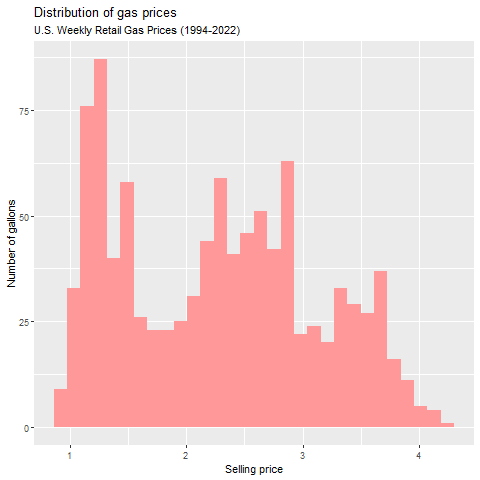

In [394]:
%%R
ggplot(gas_price) + geom_histogram(aes(x=Gas_price_per_gallon), fill="#FF9999") +
  ggtitle("Distribution of gas prices", subtitle = "U.S. Weekly Retail Gas Prices (1994-2022)") +
  xlab("Selling price") + 
  ylab("Number of gallons")

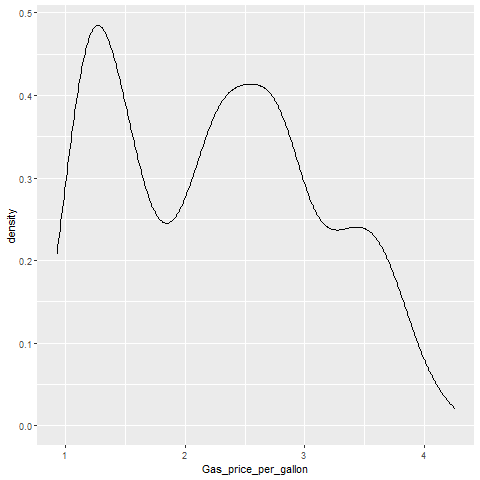

In [395]:
%%R
ggplot(gas_price) + geom_density(aes(x=Gas_price_per_gallon))

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



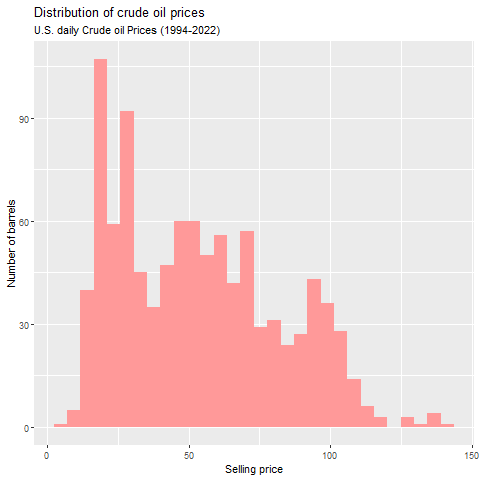

In [396]:
%%R
ggplot(gas_price) + geom_histogram(aes(x=Crude_price_per_barrel), fill="#FF9999") +
  ggtitle("Distribution of crude oil prices", subtitle = "U.S. daily Crude oil Prices (1994-2022)") +
  xlab("Selling price") + 
  ylab("Number of barrels")

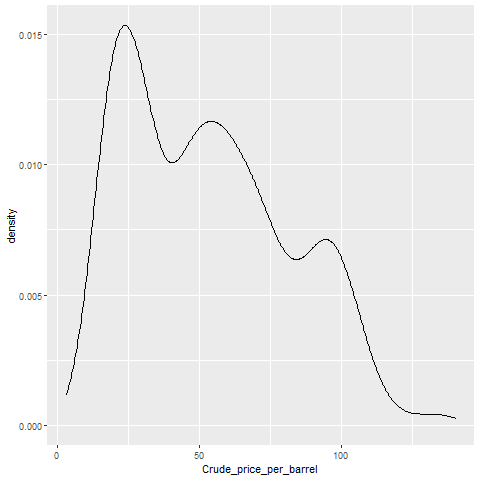

In [397]:
%%R
ggplot(gas_price) + geom_density(aes(x=Crude_price_per_barrel))

> For crude price per barrel, most of these were in the lower range as well, with the majority of these at less than a 100 dollars per barrel price point.  The peak was at 20 dollars per barrel, and the maximum selling price was approximately 145 dollars per barrel.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



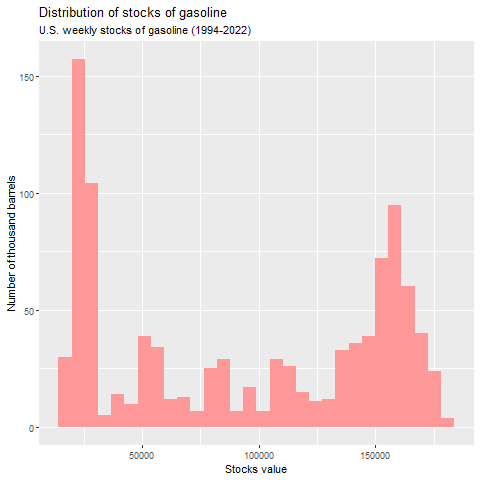

In [398]:
%%R
ggplot(gas_price) + geom_histogram(aes(x=Stocks_per_thousand_barrels), fill="#FF9999") +
  ggtitle("Distribution of stocks of gasoline", subtitle = "U.S. weekly stocks of gasoline (1994-2022)") +
  xlab("Stocks value") + 
  ylab("Number of thousand barrels")

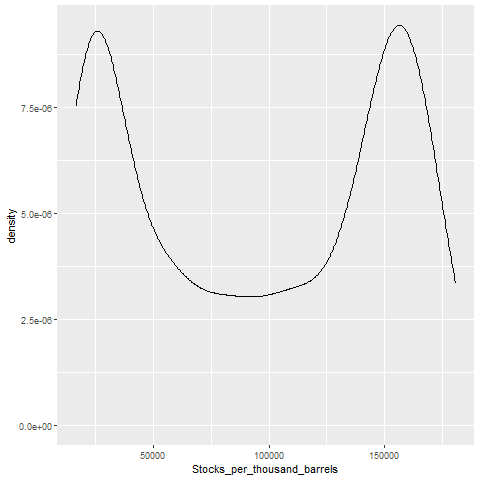

In [399]:
%%R 
ggplot(gas_price) + geom_density(aes(x=Stocks_per_thousand_barrels))

> The distribution of stocks per thousand barrels is bimodal, with extremes on both ends of the range and a dip in the middle.  There is a wide range for this data, from approximately $20,000 to $80,000 per thousand barrels.

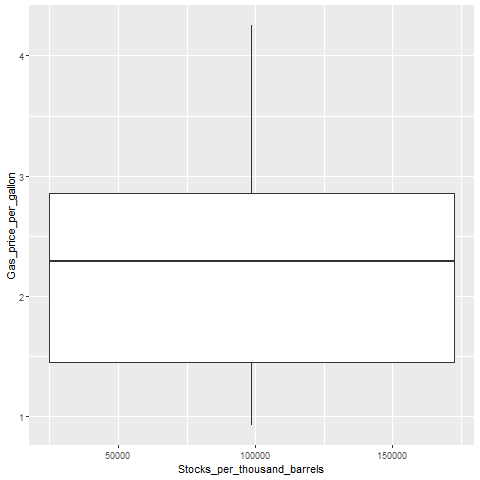

In [400]:
%%R
ggplot(data = gas_price) +
  geom_boxplot(aes(y=Gas_price_per_gallon, x=Stocks_per_thousand_barrels))


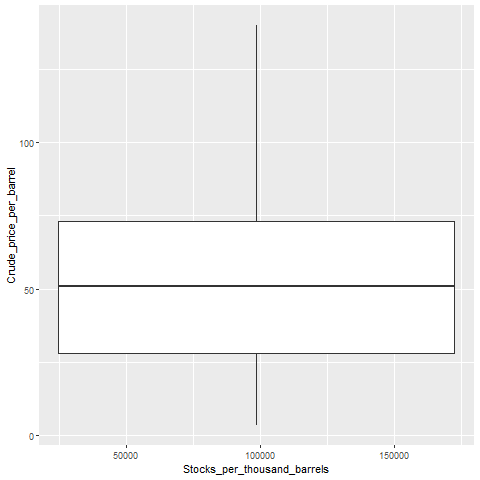

In [401]:
%%R
ggplot(data = gas_price) +
  geom_boxplot(aes(y=Crude_price_per_barrel, x=Stocks_per_thousand_barrels))

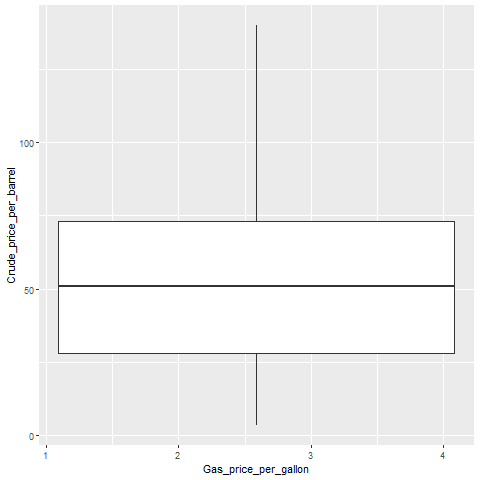

In [402]:
%%R
ggplot(data = gas_price) +
  geom_boxplot(aes(y=Crude_price_per_barrel, x=Gas_price_per_gallon))

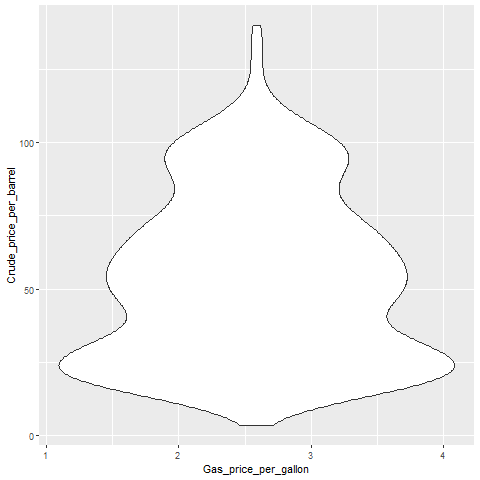

In [403]:
%%R
ggplot(data = gas_price) +
  geom_violin(aes(y=Crude_price_per_barrel, x=Gas_price_per_gallon))

In [404]:
%%R 
skim(gas_price)

-- Data Summary ------------------------
                           Values   
Name                       gas_price
Number of rows             1006     
Number of columns          9        
_______________________             
Column type frequency:              
  Date                     2        
  numeric                  7        
________________________            
Group variables            None     

-- Variable type: Date ---------------------------------------------------------
# A tibble: 2 x 7
  skim_variable  n_missing complete_rate min        max        median    
* <chr>              <int>         <dbl> <date>     <date>     <date>    
1 Date                   0             1 1994-11-25 2022-03-25 2008-08-04
2 Gas_price_date         0             1 1994-11-28 2022-03-28 2008-08-07
  n_unique
*    <int>
1     1006
2     1006

-- Variable type: numeric ------------------------------------------------------
# A tibble: 7 x 11
  skim_variable                n_missing complet

> The above Skim function shows us the summary of our dataset in terms of the type of columns in our dataframe.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



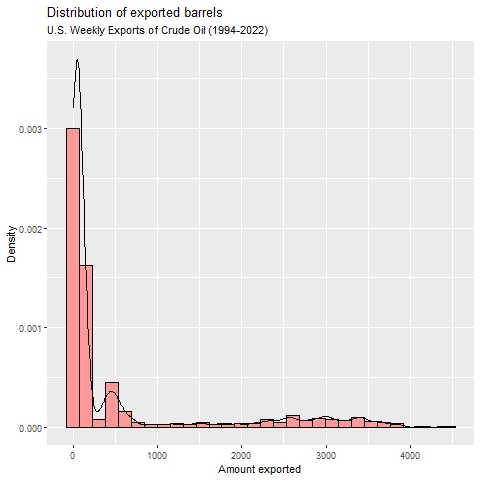

In [405]:
%%R
ggplot(gas_price, aes(x = Exp_thousand_barrels_per_day)) + 
  ggtitle("Distribution of exported barrels", subtitle = "U.S. Weekly Exports of Crude Oil (1994-2022)") +
  xlab("Amount exported") +
  ylab("Density") +
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "#FF9999") +
  geom_density()

> For the distribution of exported barrels, there is a right-skewed distribution as seen above, showing that there was typically a low amount of exported barrels.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



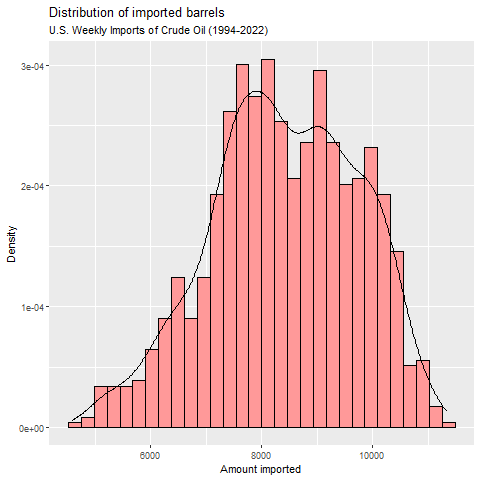

In [406]:
%%R
ggplot(gas_price, aes(x = Imp_thousand_barrels_per_day)) + 
  ggtitle("Distribution of imported barrels", subtitle = "U.S. Weekly Imports of Crude Oil (1994-2022)") +
  xlab("Amount imported") +
  ylab("Density") +
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "#FF9999") +
  geom_density()

 > The amount imported has a slight left-skew, but this is less extreme than the skew on the amount imported.

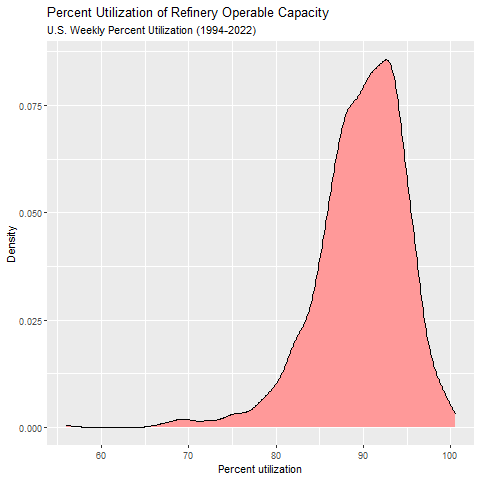

In [407]:
%%R
ggplot(gas_price) + geom_density(aes(x=Utilization_percentage), fill="#FF9999") +
  ggtitle("Percent Utilization of Refinery Operable Capacity", subtitle = "U.S. Weekly Percent Utilization (1994-2022)") +
  xlab("Percent utilization") +
  ylab("Density")

> The percent utilization has a left skew, showing that there was typically a high percent utilization of the refinery operable capacity.

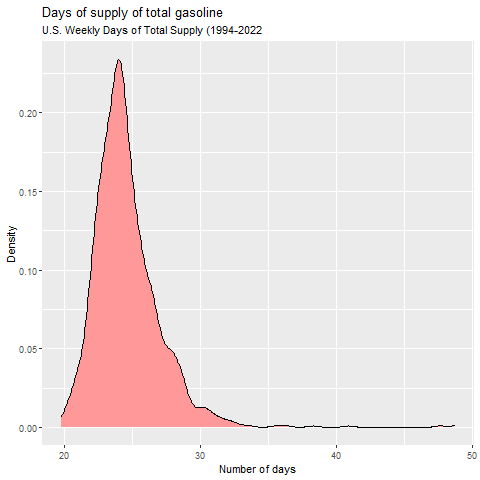

In [408]:
%%R
ggplot(gas_price) + geom_density(aes(x=No_of_days), fill="#FF9999") +
  ggtitle("Days of supply of total gasoline", subtitle = "U.S. Weekly Days of Total Supply (1994-2022") +
  xlab("Number of days") +
  ylab("Density")

> The days of supply variable has a right skew, and is centered around the 25 day mark.  This measures the adequacy of inventories, and remains relatively consistent throughtout the data, primarily between the 20 and 30 day marks.

In [409]:
%%R
cols_for_corr <- c(2:7, 9)

gasprice_cor <- cor(gas_price[, cols_for_corr])
gasprice_cor

                             Crude_price_per_barrel Stocks_per_thousand_barrels
Crude_price_per_barrel                   1.00000000                  -0.5947264
Stocks_per_thousand_barrels             -0.59472636                   1.0000000
No_of_days                              -0.18501640                  -0.1964410
Utilization_percentage                  -0.35799013                   0.3475956
Exp_thousand_barrels_per_day             0.05832063                  -0.6024818
Imp_thousand_barrels_per_day             0.06797031                   0.4708912
Gas_price_per_gallon                     0.96773237                  -0.7217388
                             No_of_days Utilization_percentage
Crude_price_per_barrel       -0.1850164             -0.3579901
Stocks_per_thousand_barrels  -0.1964410              0.3475956
No_of_days                    1.0000000             -0.3143965
Utilization_percentage       -0.3143965              1.0000000
Exp_thousand_barrels_per_day  0.4088613      

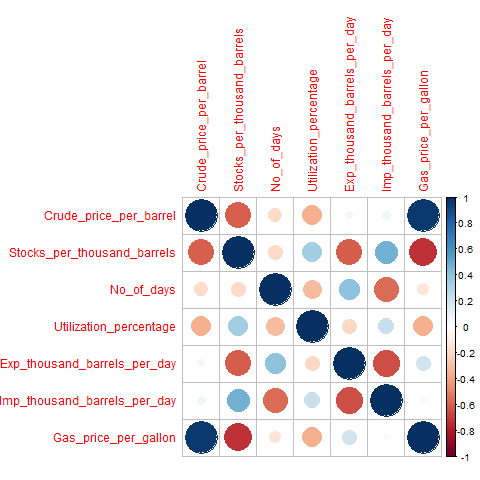

In [410]:
%%R
corrplot::corrplot(gasprice_cor)

> The above correlation plot exhibits the relationship between the variables of our dataset. We can see that Crude Price and Stocks have a stronger correlation with Gas Price, the Crude Price has a strong Positive correlation whereas Stocks has a strong Negative correlation with Gas Price.

## Train Test Split

In [411]:
%%R
# Simple partition into train (70%) and test (30%) set 
set.seed(447)
trainIndex <- createDataPartition(gas_price$Gas_price_per_gallon, p = .7, 
                                  list = FALSE, 
                                  times = 1)

gas_price_train <- gas_price[as.vector(trainIndex), ]  
gas_price_test <- gas_price[-as.vector(trainIndex), ]

## EDA on training data

### Scatter plots

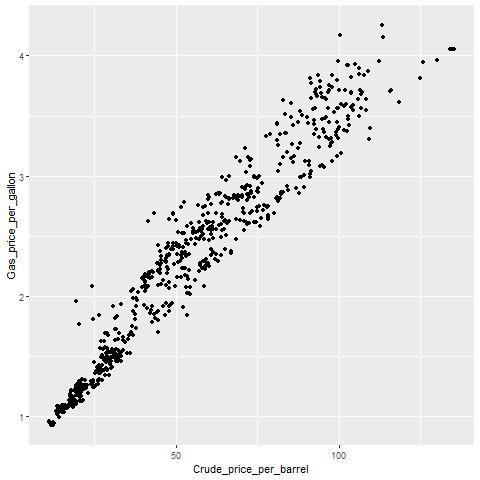

In [412]:
%%R
ggplot(gas_price_train) + geom_point(aes(x=Crude_price_per_barrel, y=Gas_price_per_gallon))

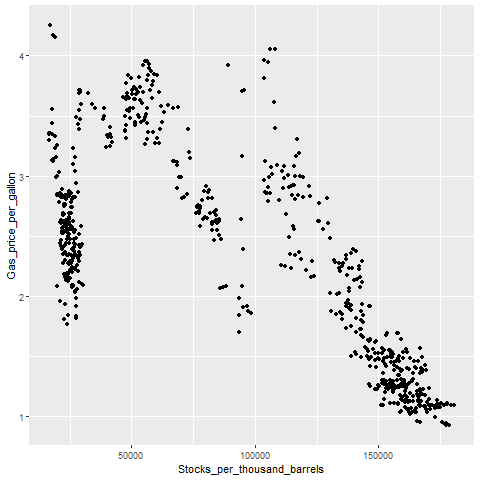

In [413]:
%%R
ggplot(gas_price_train) + geom_point(aes(x=Stocks_per_thousand_barrels, y=Gas_price_per_gallon))

## Model Building
### Null model

In [414]:
%R mean(gas_price_train$Gas_price_per_gallon)

array([2.27330737])

In [415]:
%%R
gasprice_lm0 <- lm(Gas_price_per_gallon ~ 1, data = gas_price_train)
summary(gasprice_lm0)


Call:
lm(formula = Gas_price_per_gallon ~ 1, data = gas_price_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34731 -0.82206  0.01869  0.58519  1.97869 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.27331    0.03224   70.52   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8565 on 705 degrees of freedom



In [416]:
%%R
# Compute overall mean Gas Price
null_pred <- mean(gas_price_train$Gas_price_per_gallon)
sprintf("Null model prediction: %.2f", null_pred)

# Compute null model MAE on train
null_train_mae <- MAE(gas_price_train$Gas_price_per_gallon, null_pred)
sprintf("Null model train MAE: %.2f", null_train_mae)

# Compute null model MAE on test
null_test_mae <- MAE(gas_price_test$Gas_price_per_gallon, null_pred)
sprintf("Null model test MAE: %.2f", null_test_mae)

[1] "Null model test MAE: 0.72"


### Model-1: Linear Regression Model considering all the independent variables

In [417]:
%%R
gasprice_lm1 <- lm(Gas_price_per_gallon ~ Crude_price_per_barrel	+ Stocks_per_thousand_barrels +	No_of_days	+ Utilization_percentage +	Exp_thousand_barrels_per_day + Imp_thousand_barrels_per_day, data = gas_price_train)
summary(gasprice_lm1)


Call:
lm(formula = Gas_price_per_gallon ~ Crude_price_per_barrel + 
    Stocks_per_thousand_barrels + No_of_days + Utilization_percentage + 
    Exp_thousand_barrels_per_day + Imp_thousand_barrels_per_day, 
    data = gas_price_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41574 -0.08708 -0.01783  0.05478  0.49003 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.041e+00  1.714e-01   6.076 2.02e-09 ***
Crude_price_per_barrel        2.478e-02  2.928e-04  84.610  < 2e-16 ***
Stocks_per_thousand_barrels  -3.387e-06  1.723e-07 -19.664  < 2e-16 ***
No_of_days                   -7.583e-03  2.844e-03  -2.666  0.00785 ** 
Utilization_percentage        3.616e-03  1.241e-03   2.913  0.00370 ** 
Exp_thousand_barrels_per_day  2.216e-05  7.934e-06   2.794  0.00536 ** 
Imp_thousand_barrels_per_day  8.294e-06  6.115e-06   1.356  0.17545    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R

#### Multicollinearity Check

In [418]:
%%R 
vif(gasprice_lm1)

      Crude_price_per_barrel  Stocks_per_thousand_barrels 
                    2.578147                     3.497961 
                  No_of_days       Utilization_percentage 
                    1.732759                     1.437350 
Exp_thousand_barrels_per_day Imp_thousand_barrels_per_day 
                    2.309302                     2.386561 


> as we can see in the above Variance Inflation Factor the values for the independent variables were less than 5 which indicates that there is no issue of multicollinearity with this model.

In [419]:
%%R
### Compute MAE for the fitted model on training data

mae_train <- c(MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm0$fitted.values),
                MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm1$fitted.values)
)
mae_train_lm1 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm1$fitted.values)

### Use fitted model to make predictions on test data

predict_lm1 <- predict(gasprice_lm1, newdata = gas_price_test)

### Compute MAE for the predictions on the test data

mae_test <- c(MAE(gas_price_test$Gas_price_per_gallon, null_pred),
                MAE(gas_price_test$Gas_price_per_gallon, predict_lm1)
)


> The gasprice_lm1 fits pretty well as it has r-square value of 0.9736 which is closer to 1 and almost all of them are significant variables except for import data variable. Whereas the MAE for gasprice_lm1 is lower than MAE for gasprice_lm0 since gasprice_lm1 contains additional variables.

***More Model building***

### Model-2: Linear Regression Model considering stocks, no of days of supply, refinary capacity, export data and import data

In [420]:
%%R
gasprice_lm2 <- lm(Gas_price_per_gallon ~ Stocks_per_thousand_barrels + No_of_days + Utilization_percentage + Exp_thousand_barrels_per_day + Imp_thousand_barrels_per_day, data = gas_price_train)

summary(gasprice_lm2)

### Compute MAE for the fitted model on training data

mae_train_lm2 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm2$fitted.values)

mae_train_lm2

[1] 0.3571621


### Model-3: Linear Regression Model considering stocks, no of days of supply, refinary capacity, and export data

In [421]:
%%R
gasprice_lm3 <- lm(Gas_price_per_gallon ~ Stocks_per_thousand_barrels + No_of_days + Utilization_percentage + Exp_thousand_barrels_per_day, data = gas_price_train)

summary(gasprice_lm3)

### Compute MAE for the fitted model on training data

mae_train_lm3 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm3$fitted.values)

mae_train_lm3

[1] 0.3745696


### Model-4: Linear Regression Model considering stocks, no of days of supply, and refinary capacity

In [422]:
%%R
gasprice_lm4 <- lm(Gas_price_per_gallon ~ Stocks_per_thousand_barrels + No_of_days + Utilization_percentage, data = gas_price_train)

summary(gasprice_lm4)

### Compute MAE for the fitted model on training data

mae_train_lm4 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm4$fitted.values)

mae_train_lm4

[1] 0.4032406


### Model-5: Linear Regression Model considering stocks and no of days of supply

In [423]:
%%R
gasprice_lm5 <- lm(Gas_price_per_gallon ~ Stocks_per_thousand_barrels + No_of_days, data = gas_price_train)

summary(gasprice_lm5)

### Compute MAE for the fitted model on training data

mae_train_lm5 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm5$fitted.values)

mae_train_lm5

[1] 0.429309


### Model-6: Linear Regression Model considering only stocks as independent variable

In [424]:
%%R
gasprice_lm6 <- lm(Gas_price_per_gallon ~ Stocks_per_thousand_barrels, data = gas_price_train)

summary(gasprice_lm6)

### Compute MAE for the fitted model on training data

mae_train_lm6 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm6$fitted.values)

mae_train_lm6

[1] 0.4858075


### Model-7: Linear Regression Model considering stocks, no of days of supply, refinary capacity, export data and crude price

In [425]:
%%R
gasprice_lm7 <- lm(Gas_price_per_gallon ~ Stocks_per_thousand_barrels + No_of_days + Utilization_percentage + Exp_thousand_barrels_per_day + Crude_price_per_barrel, data = gas_price_train)
summary(gasprice_lm7)


### Compute MAE for the fitted model on training data

mae_train_lm7 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm7$fitted.values)

mae_train_lm7

[1] 0.1034463


### Model-8: Linear Regression Model considering crude price, stocks, no of days of supply and refinary capacity

In [426]:
%%R

gasprice_lm8 <- lm(Gas_price_per_gallon ~ Crude_price_per_barrel + Stocks_per_thousand_barrels + No_of_days + Utilization_percentage, data = gas_price_train)
summary(gasprice_lm8)

### Compute MAE for the fitted model on training data

mae_train_lm8 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm8$fitted.values)

mae_train_lm8

[1] 0.1046638


### Model-9: Linear Regression Model considering crude price, stocks and no of days of supply

In [427]:
%%R
gasprice_lm9 <- lm(Gas_price_per_gallon ~ Crude_price_per_barrel + Stocks_per_thousand_barrels + No_of_days, data = gas_price_train)
summary(gasprice_lm9)

### Compute MAE for the fitted model on training data

mae_train_lm9 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm9$fitted.values)

mae_train_lm9

[1] 0.1053172


### Model-10: Linear Regression Model considering crude price and  stocks

In [428]:
%%R
gasprice_lm10 <- lm(Gas_price_per_gallon ~ Crude_price_per_barrel	+ Stocks_per_thousand_barrels, data = gas_price_train)
summary(gasprice_lm10)

### Compute MAE for the fitted model on training data

mae_train_lm10 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm10$fitted.values)

mae_train_lm10

[1] 0.1052105


### Model-11: Linear Regression Model considering only the crude price as independent variable

In [429]:
%%R
gasprice_lm11 <- lm(Gas_price_per_gallon ~ Crude_price_per_barrel, data = gas_price_train)
summary(gasprice_lm11)

### Compute MAE for the fitted model on training data

mae_train_lm11 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm11$fitted.values)

mae_train_lm11

[1] 0.1704284


### Model-12: Linear Regression Model considering no of days of supply, refinery capacity,  export data, import data and crude price

In [430]:
%%R
gasprice_lm12 <- lm(Gas_price_per_gallon ~ No_of_days + Utilization_percentage + Exp_thousand_barrels_per_day + Imp_thousand_barrels_per_day + Crude_price_per_barrel, data = gas_price_train)
summary(gasprice_lm12)

### Compute MAE for the fitted model on training data

mae_train_lm12 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm12$fitted.values)

mae_train_lm12

[1] 0.1335655


### Model-13: Linear Regression Model considering no of days of supply, refinery capacity,  export and import data

In [431]:
%%R
gasprice_lm13 <- lm(Gas_price_per_gallon ~ No_of_days + Utilization_percentage + Exp_thousand_barrels_per_day + Imp_thousand_barrels_per_day, data = gas_price_train)
summary(gasprice_lm13)

### Compute MAE for the fitted model on training data

mae_train_lm13 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm13$fitted.values)

mae_train_lm13

[1] 0.6063415


### Model-14: Linear Regression Model considering no of days of supply, refinery capacity, and export data

In [432]:
%%R
gasprice_lm14 <- lm(Gas_price_per_gallon ~ No_of_days + Utilization_percentage + Exp_thousand_barrels_per_day, data = gas_price_train)
summary(gasprice_lm14)

### Compute MAE for the fitted model on training data

mae_train_lm14 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm14$fitted.values)

mae_train_lm14

[1] 0.6064749


### Model-15: Linear Regression Model considering no of days of supply and refinery capacity

In [433]:
%%R
gasprice_lm15 <- lm(Gas_price_per_gallon ~ No_of_days + Utilization_percentage, data = gas_price_train)
summary(gasprice_lm15)

### Compute MAE for the fitted model on training data

mae_train_lm15 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm15$fitted.values)

mae_train_lm15

[1] 0.6472869


### Model-16: Linear Regression Model considering only no of days of supply as independent variable

In [434]:
%%R
gasprice_lm16 <- lm(Gas_price_per_gallon ~ No_of_days, data = gas_price_train)
summary(gasprice_lm16)

### Compute MAE for the fitted model on training data

mae_train_lm16 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm16$fitted.values)

mae_train_lm16

[1] 0.725579


### Model-17: Linear Regression Model considering refinery capacity, crude price, stocks, no of days of supply and import data

In [435]:
%%R
gasprice_lm17 <- lm(Gas_price_per_gallon ~ Utilization_percentage + Crude_price_per_barrel + Stocks_per_thousand_barrels +	No_of_days  + Imp_thousand_barrels_per_day, data = gas_price_train)
summary(gasprice_lm17)

### Compute MAE for the fitted model on training data

mae_train_lm17 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm17$fitted.values)

mae_train_lm17

[1] 0.1046834


### Model-18: Linear Regression Model considering refinery capacity and crude price

In [436]:
%%R
gasprice_lm18 <- lm(Gas_price_per_gallon ~ Utilization_percentage + Crude_price_per_barrel, data = gas_price_train)
summary(gasprice_lm18)

### Compute MAE for the fitted model on training data

mae_train_lm18 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm18$fitted.values)

mae_train_lm18

[1] 0.1700321


### Model-19: Linear Regression Model considering only refinery capacity as independent variable

In [437]:
%%R
gasprice_lm19 <- lm(Gas_price_per_gallon ~ Utilization_percentage, data = gas_price_train)
summary(gasprice_lm19)

### Compute MAE for the fitted model on training data

mae_train_lm19 <- MAE(gas_price_train$Gas_price_per_gallon, gasprice_lm19$fitted.values)

mae_train_lm19

[1] 0.6769605


In [438]:
%%R
# Rank MAEs
maes <- c(mae_train_lm1,
          mae_train_lm2,
          mae_train_lm3,
          mae_train_lm4,
          mae_train_lm5,
          mae_train_lm6,
          mae_train_lm7,
          mae_train_lm8,
          mae_train_lm9,
          mae_train_lm10,
          mae_train_lm11,
          mae_train_lm12,
          mae_train_lm13,
          mae_train_lm14,
          mae_train_lm15,
          mae_train_lm16,
          mae_train_lm17,
          mae_train_lm18,
          mae_train_lm19)

maes
rank(maes)

 [1]  1 10 11 12 13 14  2  3  6  5  9  7 15 16 17 19  4  8 18


So, `lm1` has the lowest MAE followed by `lm7` and then `lm8`.

Let's see how these three models do in predicting the test data values.

In [439]:
%%R
pred_lm1 <- predict(gasprice_lm1, newdata = gas_price_test)
MAE(pred_lm1, gas_price_test$Gas_price_per_gallon)

[1] 0.1081121


In [440]:
%%R
pred_lm7 <- predict(gasprice_lm7, newdata = gas_price_test)
MAE(pred_lm7, gas_price_test$Gas_price_per_gallon)

[1] 0.1084135


In [441]:
%%R
pred_lm8 <- predict(gasprice_lm8, newdata = gas_price_test)
MAE(pred_lm8, gas_price_test$Gas_price_per_gallon)

[1] 0.1096322


### Model diagnostics

#### Scatterplots of actual vs fitted values
For our top 3 models, we  have created a scatter plot showing actual vs fitted values
of `Gas Price`.
> Here are the scatters on the training data.

In [442]:
%%R
scatter_train_df <- data.frame(gasprice_actual = gas_price_train[,"Gas_price_per_gallon"],
                          lm1 = gasprice_lm1$fitted.values,
                          lm7 = gasprice_lm7$fitted.values,
                          lm8 = gasprice_lm8$fitted.values)

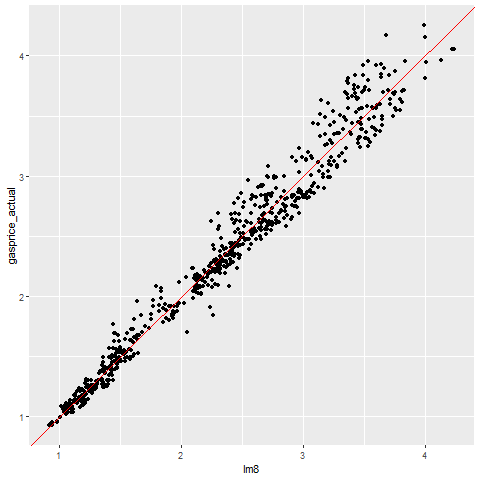

In [443]:
%%R
ggplot(scatter_train_df) + geom_point(aes(x=lm1, y=gasprice_actual)) + geom_abline(color='red')
ggplot(scatter_train_df) + geom_point(aes(x=lm7, y=gasprice_actual)) + geom_abline(color='red')
ggplot(scatter_train_df) + geom_point(aes(x=lm8, y=gasprice_actual)) + geom_abline(color='red')

> The scatters confirm the relative rankings of our top 3 models

In [444]:
%%R
scatter_test_df <- data.frame(gasprice_actual = gas_price_test[,"Gas_price_per_gallon"],
                          lm1 = pred_lm1,
                          lm7 = pred_lm7,
                          lm8 = pred_lm8)
head(scatter_test_df)

   gasprice_actual      lm1      lm7      lm8
4            3.480 3.498988 3.497462 3.472433
6            3.321 3.325307 3.319293 3.304099
7            3.271 3.304913 3.304877 3.281417
9            3.216 3.103842 3.113279 3.091159
10           3.211 3.019522 3.022481 2.992055
12           3.252 3.026161 3.029309 2.985269


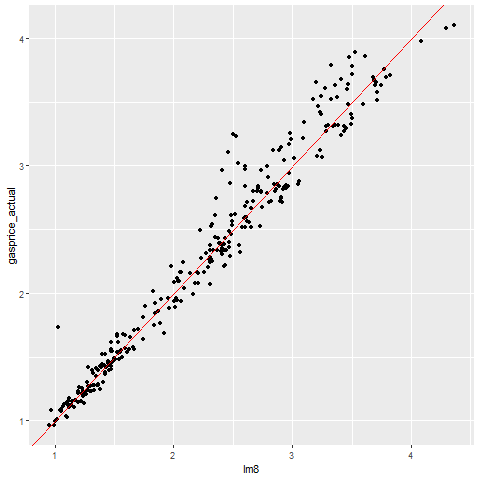

In [445]:
%%R
ggplot(scatter_test_df) + geom_point(aes(x=lm1, y=gasprice_actual)) + geom_abline(color='red')
ggplot(scatter_test_df) + geom_point(aes(x=lm7, y=gasprice_actual)) + geom_abline(color='red')
ggplot(scatter_test_df) + geom_point(aes(x=lm8, y=gasprice_actual)) + geom_abline(color='red')

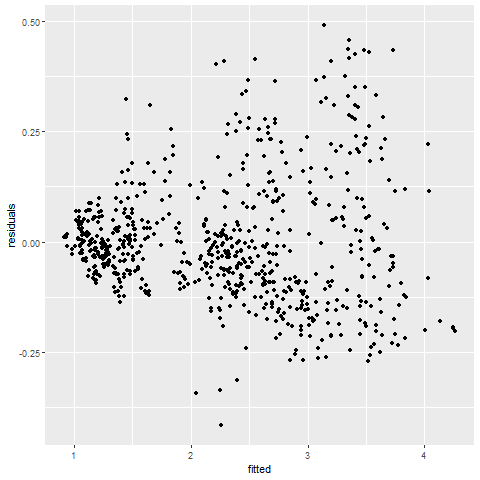

In [446]:
%%R
ggplot(data.frame(residuals=gasprice_lm1$residuals,
                  fitted=gasprice_lm1$fitted.values)) + geom_point(aes(x=fitted, y=residuals))

> The plot does not have constant variance as it is more of a fanned out shape which leads the selected top model towards being “Heteroskedastic”.

#### Make predictions for the test dataset

For each of our top 3 models, we made predictions for `Gas Price` using `gas_price_test`.

In [447]:
%%R
price_predict <- data.frame(predict1=predict(gasprice_lm1, newdata=gas_price_test),
                             predict7=predict(gasprice_lm7, newdata=gas_price_test),
                             predict8=predict(gasprice_lm8, newdata=gas_price_test),
                             price_actual=gas_price_test$Gas_price_per_gallon)

#### Evaluate the predictions of linear regression models - R

We then computed the MAE for each of the three models' predictions on the test data.

In [448]:
%%R
price_predict_MAE <- data.frame(predict1_MAE=MAE(price_predict$predict1, gas_price_test$Gas_price_per_gallon),
                                predict7_MAE=MAE(price_predict$predict7, gas_price_test$Gas_price_per_gallon),
                                predict8_MAE=MAE(price_predict$predict8, gas_price_test$Gas_price_per_gallon))

price_predict_MAE

  predict1_MAE predict7_MAE predict8_MAE
1    0.1081121    0.1084135    0.1096322


In [449]:
%%R
finalpredtestData<-data.frame(gas_price_test$Date,price_predict$predict7,gas_price_test$Gas_price_per_gallon )
colnames(finalpredtestData) <-c("Date","GasPricePredicted", "GasPriceActual")

### Linear Regression using scikit-learn

In [450]:
#Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [451]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [452]:
X = gas_price_df.iloc[:, 1:7]
X.shape

(1006, 6)

In [453]:
X.head(5)

,Crude_price_per_barrel,Stocks_per_thousand_barrels,No_of_days,Utilization_percentage,Exp_thousand_barrels_per_day,Imp_thousand_barrels_per_day
0,113.69,18971,27.3,92.1,2988,6259
1,100.43,18344,27.0,91.1,3844,6486
2,113.39,17123,27.3,90.4,2936,6395
3,92.18,17714,28.0,87.7,3796,5767
4,92.89,17624,28.5,87.4,2686,6828


In [454]:
y = gas_price_df['Gas_price_per_gallon']
y.shape

(1006,)

In [455]:
y.head(5)

0    4.152
1    4.165
2    4.252
3    3.554
4    3.480
Name: Gas_price_per_gallon, dtype: float64

In [456]:
#Train Test Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.30,
                                                random_state=447)

print('Xtrain.shape is {}'.format(Xtrain.shape))
print('Xtest.shape is {}'.format(Xtest.shape))
print('ytrain.shape is {}'.format(ytrain.shape))
print('ytest.shape is {}'.format(ytest.shape))

Xtrain.shape is (704, 6)
Xtest.shape is (302, 6)
ytrain.shape is (704,)
ytest.shape is (302,)


In [457]:
model.fit(Xtrain, ytrain)                 
y_model = model.predict(Xtest)            

In [458]:
model.score(Xtrain,ytrain)
model.score(Xtest,ytest)

0.9670790101314233

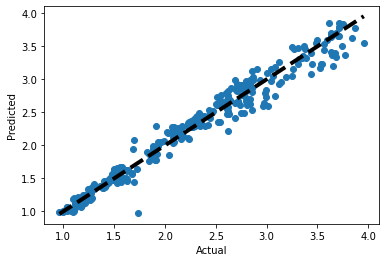

In [459]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_model)
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [460]:
mae_test = mean_absolute_error(ytest, y_model)
mae_test

0.10827973380517165

### Deep Neural Network Model

In [461]:
#DNN Model 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

dnnModel = tf.keras.Sequential()

dnnModel.add(tf.keras.layers.Dense(128, input_shape=(6, ), activation='relu', name='dense_1', kernel_initializer='GlorotNormal'))
dnnModel.add(tf.keras.layers.Dense(64, activation='relu', name='dense_2'))
dnnModel.add(tf.keras.layers.Dense(32, activation='relu', name='dense_3'))
dnnModel.add(tf.keras.layers.Dense(12, activation='relu', name='dense_4'))
dnnModel.add(tf.keras.layers.Dense(1, activation='linear', name='dense_output'))

dnnModel.compile(loss='mean_squared_error', metrics=['mae'], optimizer=tf.keras.optimizers.Adam(0.1))
dnnModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               896       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 12)                396       
                                                                 
 dense_output (Dense)        (None, 1)                 13        
                                                                 
Total params: 11,641
Trainable params: 11,641
Non-trainable params: 0
_________________________________________________________________


In [462]:
#Train the model
history = dnnModel.fit(Xtrain, ytrain, epochs=100)

Epoch 1/100
22/22 [==============================] - 0s 2ms/step - loss: 9528093696.0000 - mae: 18308.2168
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 55.8529 - mae: 2.8392
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 2.3701 - mae: 1.2703
Epoch 4/100
22/22 [==============================] - 0s 746us/step - loss: 1.9253 - mae: 1.1070
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 1.7783 - mae: 1.0559
Epoch 6/100
22/22 [==============================] - 0s 889us/step - loss: 1.6651 - mae: 1.0209
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5676 - mae: 0.9908
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 1.4708 - mae: 0.9612
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 1.3801 - mae: 0.9359
Epoch 10/100
22/22 [==============================] - 0s 744us/step - loss: 1.2964 - mae: 0.9129
Epoch 11/100
22/22 [===================

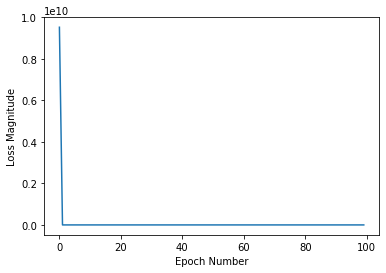

In [463]:
# Display Training Statistics
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss']);

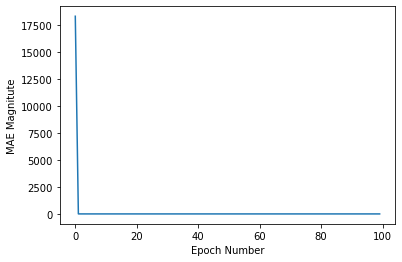

In [464]:
plt.xlabel('Epoch Number')
plt.ylabel("MAE Magnitute")
plt.plot(history.history['mae']);

In [465]:
# Evaluate the model
mse_nn, mae_nn = dnnModel.evaluate(Xtest,ytest)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

10/10 [==============================] - 0s 868us/step - loss: 0.6546 - mae: 0.6893
Mean squared error on test data:  0.6545915007591248
Mean absolute error on test data:  0.6892921924591064


### Polynomial Regression

In [466]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

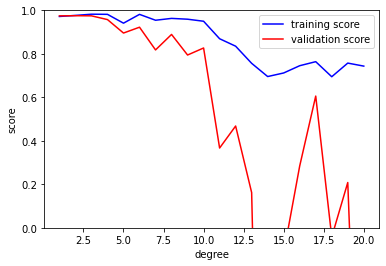

In [467]:
%matplotlib inline
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), Xtrain, ytrain,
                                          param_name = 'polynomialfeatures__degree', 
                                          param_range = degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [468]:
model_poly = PolynomialRegression(4).fit(Xtrain, ytrain)
y_poly = PolynomialRegression(4).fit(Xtrain, ytrain).predict(Xtest)

In [469]:
print(model_poly.score(Xtrain,ytrain))
print(model_poly.score(Xtest,ytest))

0.981774858472186
0.9661499598763421


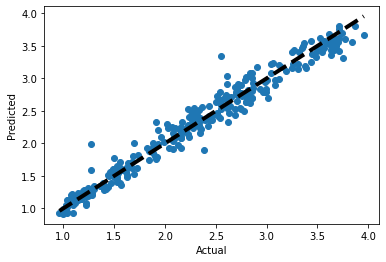

In [470]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_poly)
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [471]:
mean_absolute_error(ytest, y_poly)

0.11036346631596716

## Model Comparison and Evaluation

<table>
<tr>
<td>Model Number </td>
<td>Model Description</td>
<td>R-Squared</td>
<td>Adjusted R-squared</td>
<td>Mean Absolute Error - Train</td>
<td>Mean Absolute Error - Test</td>
</tr>
<tr>
<td>1 </td>
<td>Null Model</td>
<td></td>
<td></td>
<td>0.73</td>
<td>0.72</td>
</tr>
<tr>
<td><b>2 </b></td>
<td><b>Linear Regression with all independent variables</b></td>
<td><b>0.9736</b></td>
<td><b>0.9734</b></td>
<td><b>0.1031485</b></td>
<td><b>0.1081121</b></td>
</tr>
<tr>
<td>3 </td>
<td>LM with stocks, no of days of supply, refinary capacity, export data & import data</td>
<td>0.703</td>
<td>0.7009 </td>
<td>0.3571621</td>
<td></td>
</tr>
<tr>
<tr>
<td>4 </td>
<td>LM with stocks, no of days of supply, refinary capacity, export data</td>
<td>0.6824</td>
<td>0.6806 </td>
<td>0.3745696</td>
<td></td>
</tr>
<tr>
<td>5 </td>
<td>LM with stocks, no of days of supply, and refinary capacity</td>
<td>0.6405</td>
<td>0.6389</td>
<td>0.4032406</td>
<td></td>
</tr>

<tr>
<td>6 </td>
<td>LM with stocks and no of days of supply</td>
<td>0.6027</td>
<td>0.6015</td>
<td>0.429309</td>
<td></td>
</tr>

<tr>
<td>7 </td>
<td>LM with only stocks as independent variable</td>
<td>0.5307</td>
<td>0.5301</td>
<td>0.4858075</td>
<td></td>
</tr>

<tr>
<td>8 </td>
<td>LM with stocks, no of days of supply, refinary capacity, export data and crude price</td>
<td>0.9735</td>
<td>0.9733 </td>
<td>0.1034463</td>
<td>0.1084135</td>
</tr>

<tr>
<td>9 </td>
<td>LM with crude price, stocks, no of days of supply and refinary capacity</td>
<td>0.9733</td>
<td>0.9731</td>
<td>0.1046638</td>
<td>0.1096322</td>
</tr>

<tr>
<td>10 </td>
<td>LM with crude price, stocks and no of days of supply</td>
<td>0.973</td>
<td>0.9728</td>
<td>0.1053172</td>
<td></td>
</tr>

<tr>
<td>11 </td>
<td>LM with crude price and stocks</td>
<td>0.9722</td>
<td>0.9721</td>
<td>0.1052105</td>
<td></td>
</tr>

<tr>
<td>12 </td>
<td>LM with only the crude price as independent variable</td>
<td>0.9404</td>
<td>0.9403</td>
<td>0.1704284</td>
<td></td>
</tr>

<tr>
<td>13 </td>
<td>LM with no of days of supply, refinery capacity, export data, import data and crude price</td>
<td>0.959</td>
<td>0.9587</td>
<td>0.1335655</td>
<td></td>
</tr>
  
<tr>
<td>14 </td>
<td>LM with no of days of supply, refinery capacity, export and import data</td>
<td>0.2573</td>
<td>0.2531</td>
<td>0.6063415</td>
<td></td>
</tr>

<tr>
<td>15 </td>
<td>LM with  no of days of supply, refinery capacity, and export data</td>
<td> 0.2573</td>
<td>0.2541</td>
<td>0.6064749</td>
<td></td>
</tr>

<tr>
<td>16 </td>
<td>LM with no of days of supply and refinery capacity</td>
<td>0.215</td>
<td>0.2127</td>
<td>0.6472869</td>
<td></td>
</tr>

<tr>
<td>17 </td>
<td>LM with no of days of supply as independent variable</td>
<td>0.01756</td>
<td>0.01616</td>
<td>0.725579</td>
<td></td>
</tr>

<tr>
<td>18 </td>
<td>LM with refinery capacity, crude price, stocks, no of days of supply and import data</td>
<td>0.9733</td>
<td>0.9731</td>
<td>0.1046834</td>
<td></td>
</tr>
    
<tr>
<td>19 </td>
<td>LM with refinery capacity and crude price</td>
<td>0.9404</td>
<td>0.9403</td>
<td>0.1700321</td>
<td></td>
</tr>

<tr>
<td>20 </td>
<td>LM with only refinery capacity as independent variable</td>
<td>0.143</td>
<td>0.1418</td>
<td>0.6769605</td>
<td></td>
</tr>
    
<tr>
<td>21 </td>
<td>Linear Regression Model using scikit-learn</td>
<td></td>
<td>0.9670</td>
<td></td>
<td>0.1082</td>
</tr>

<tr>
<td>22</td>
<td>Deep Neural Network Model</td>
<td></td>
<td></td>
<td>0.7509</td>
<td>0.6897</td>
</tr>
    
<tr>
<td>23 </td>
<td>Polynomial Regression</td>
<td></td>
<td>0.9661</td>
<td></td>
<td>0.1103</td>
</tr>
    
    
</table>

In [472]:
%%R
#Actual Vs Predicted Gas Price from the champion model
ts_plot(finalpredtestData)

>In the above time series plot showcases both the actual and predicted gas price values of our champion model we can observe that both the lines are following closely with each other across the years and proves that our model fits well. But for the year 2020 probably due to COVID as a factor which caused a drastic decrease in demand so in reality the gas prices went down and we can see the model's predicted gas price was able to follow the trend but was just a little off by 0.70 cents.

>The top model is “gasprice_lm1” for which we considered all the independent variables. The model makes sense in terms of the variables included as we can see from the correlation matrix the variable “Crude Price” had a strong positive correlation while “Stocks” had a strong negative correlation with Gas Price and same signs were depicted in the coeeficient estimate value for these variables. The reason behind selecting all variables is that almost all of them are significant variables except for import data variable and this model has the lowest MAE value for both training (0.1031485) and test set (0.1081121). Whereas the R-squared value is the highest 0.9736 being a good model fit.